In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from sklearn.cluster import KMeans

In [18]:
# 비슷한 토픽끼리는 하나의 칼럼이 될 수 있도록 일일히 비슷한 토픽끼리 묶는 작업을 하였음
target = ['machinelearning','package','zsh','zerossl','youtube','xcode','x64','wysiwyg','workflow','windows','weixin','wechat','web','vue',
         'vpn','vision','vim','vedio','version','util','ui','typescript','twitter','touch','test','terminal','tensorflow',
         'telegram','task','system','swift','swagger','svg','style','static','state','ssh','sql','spring','sort','software',
         'snippets','server','security','search','scikit-learn','rfc','rest','redis','react','queue','pytorch','python','protoc','progress',
         'programming','posix','php','performance','openwrt','note','nodejs','neural','nlp','monitoring','microservice','material','macos','linux',
          'leetcode','language','kotlin','json','javascript','ios','interview','http','html','headless','graphql','git','frontend','font','flutter',
          'firefox','file','face-swap','docker','distributed','design','deep-learning','data','css','cloud','chrome','automation','api','angular',
          'android','algorithm','pull-request', 'public','pixi','open-source','object-detection','multi-platform','mini','low-code','localstorage','loading',
          'kubernetes','koa','image','humans','game','free','detection','drag','document','devops','dashboard','crypto','cpp','continuous-delivery','command','cheatsheet',
          'certificate','business','build','bootstrap','awesome','audio','apple','apache','ansi','animation','alibaba','admin','activejob'
         ]



string_list = [['machinelearning-python','ml','machine-translation','machine-learning-from-scratch','machine-learning-algorithms','machine-learning'],['packages','package-manager','packaging'],['zsh-theme','zsh-prompt','zsh-configuration','zsh-autosuggestions'],['zero-copy','zero-configuration'],['youtube-live'],['xcode10'],['x86-64','x86'],['wysiwyg-editor'],
               ['workflow-automation','works-with-clojurescript','works-with-codespaces','works-with-construct','works-with-elm','works-with-flutter','works-with-gatsby','works-with-mint','works-with-phaser','works-with-react','works-with-reason','works-with-svelte','works-with-vue','works-with-yew'],
               ['windowing','windows-10','windows-console','windows-terminal','windowscontainers'],['weixin-plugin'],['wechat-macos','wechat-mini-program','wechat-plugin','wechat-weapp'],
               ['webxr','webworkers','webview','webtorrent','webstorm','websql','websockets','websocket-server','websocket-compression','websocket-client','websocket','website','webservices','webscraping','webrtc','webpack5','webpack4','webpack2','webpack','webp','webm','webgpu','webgl2','webgl','webframework','webfont','webfinger','webdriver','webdevelopment','webdav','webcomponents','webbrowser','webaudio','webassembly','webapp','webapi','web-terminal','web-server','web-performance','web-framework','web-development','web-components','web-clipper','web-audio','web-application-framework','web-application','web-app','web','sdwebimage','react-native-web','node-webkit','mobile-web','ipfs-web'],
               ['vuex','vuetifyjs','vuetify','vuepress','vuejs3','vuejs2','vuejs','vue3','vue2','vue-router','vue-material','vue-components','vue-component','vue-cli','vue-admin','ant-design-vue'],
               ['vpn-server','vpn-client'],['visual-studio','visualizer','visualizations','visualization','visual-studio-code-theme','visual-studio-code-extension','visual-studio-code','visual-studio','data-visualization'],
               ['vimrc','vimeo','vim-plugins','vim-plugin','vim-distribution','vim-configuration','vim'],['videojs','videocache','video-recording','video-player','video-conferencing','video-communication','video','scalable-video-conferences','html5-video','explanatory-math-videos','deep-video','3b1b-videos'],
               ['versioning','version-manager'],['utils','utility-classes','utilities'],['ui-library','ui-kit','ui-design','ui-components','redis-gui-client','gui-framework','gui-app'],
               ['typescript-playground','typescript-framework','typescript-definitions','typescript'],['twitter-streaming','twitter-cards','twitter','tweet'],
               ['touchscreen','touch-events','touch'],['unit-testing','tests','testing-tools','testing','test-suite','test-runners','test-runner','test-framework','test-automation','performance-testing','pentesting-windows','pentesting','pentesters','pentest','penetration-testing','painless-javascript-testing','load-testing','javascript-tests','interview-test','end-to-end-testing','e2e-tests','e2e-testing','api-testing','api-test'],
               ['windows-terminal','web-terminal','terminals','terminal-themes','terminal-schemes','terminal-emulators','terminal-color','terminal','osx-terminal-themes','lxterminal'],
               ['tensorflow-lite','tensorflow','tensor'],['telegram-solution','telegram-desktop'],['task-scheduler','task-runner','task-manager'],
               ['systems-science','systems','system-design','system','recommendedsystem','operating-system','management-system','fuse-filesystem','filesystem','embedded-systems','distributed-systems','design-systems','design-system','database-systems','content-management-system','build-system'],
               ['swiftyjson','swiftui','swiftpm','swift4-2','swift-programming','swift-package-manager','swift-library','swift-language','swift-framework','swift-extensions','swift','server-side-swift','rxswift','reactiveswift','openstack-swift','json-parsing-swift','ios-swift','awesome-swift','apple-swift'],
               ['swagger2','swagger-ui','swagger-js','swagger-api'],['svgo','svg-sprites','svg-path','svg-icons'],['stylesheets','stylesheet-language','styleguide','styled-components','style-linter','style-guide'],
               ['static-site-generator','static-code-analysis','static-analysis'],['statechart','state-tree','state-management','state-machine'],
               ['ssh-tunnel','ssh-server','ssh-agent'],['websql','sqlserver','sqlmap','sqlite','sql-server','sql-injection','sql-editor','sql','spark-sql','postgresql','nosql','mysql-compatibility','mysql','mssql','microsoft-sql-server'],
               ['springs','springmvc','springcloud-config','springcloud','springbootadmin','springboot-shiro','springboot','spring-session','spring-security','spring-physics','spring-framework','spring-data-jpa','spring-cloud-core','spring-cloud-alibaba','spring-cloud','spring-cache','spring-boot-upload-file','spring-boot-mongodb','spring-boot-mail','spring-boot-learning','spring-boot-examples','spring-boot-demo','spring-boot-2','spring-boot','spring','react-spring'],
               ['sorts','sorting-algorithms','sortable'],['software-engineering','software-engineer','software-development','software-analysis'],
               ['snippets-library','snippets-collection','snippets'],['websocket-server','web-server','vpn-server','ssh-server','sqlserver','sql-server','serverless-functions','serverless-framework','serverless-architectures','serverless','server-side-swift','server-side-rendering','server-rendering','server','parse-server','observer','microsoft-sql-server','jumpserver','http-server','graphql-server','dns-server','dhcp-server','dev-server','api-server'],
               ['spring-security','security-researchers','security-checklist','security-book','security','macos-security','macbook-security','docker-security','application-security'],
               ['site-search','silver-searcher','security-researchers','searches','search-in-text','search-engines','search-engine','search','research','jobsearch','jobs-search','hyperparameter-search','entreprise-search','elasticsearch','distributed-search-engine'],
               ['scikit-learn-python','scikit-learn'],['rfc-8259','rfc-7159','rfc-7049','rfc-6902','rfc-6901','rfc-6455'],['restful-api','restful','rest-api','rest','postgrest','api-rest','admin-on-rest'],
               ['redis-gui-client','redis-gui','redis-cluster','redis-client'],['works-with-react','reactjs','reactivex','reactiveui','reactiveswift','reactivecocoa','reactive-streams','reactive-programming','reactive','react16','react-tutorial','react-spring','react-router','react-navigation','react-native-web','react-native','react-interview-questions','react-hooks','react-components','react-component','react-boilerplate','react-apps','react-admin'],
               ['sqs-queue','queued-jobs','queue-workers','queue-tasks','queue','message-queue'],['pytorch-tutorial','pytorch-transformers'],['scikit-learn-python','python3','python-types','python-resources','python-requests','python-library','python-interview-questions','python-framework','python-cheatsheet','python-3','python','progress-bar-python'],
               ['protocol-compiler','protocol-buffers','protocol','protoc','ipfs-protocol','homekit-accessory-protocol','acme-protocol'],['progressmeter','progressbar','progress-bar-python','progress-bar'],['swift-programming','reactive-programming','programming-tutorial','programming-ligatures','programming-language','programming-interviews','programming-blogs','programming','programmer','javascript-programming','functional-programming','dynamic-programming-algorithm','dynamic-programming','concurrent-programming','competitive-programming'],
               ['posix-sh','posix-compliant-flags','posix-compliant'],['phpunit','phpstorm','phpmailer','php8','php7','php-library','php-installation','php-framework','php-applications','php','modern-php','designpatternsphp'],
               ['web-performance','performance-testing','performance-metrics','performance-analysis','performance','high-performance','best-performance'],
               ['openwrt-zh-cn','openwrt-shadowsocksr-libev-full','openwrt-package','openwrt-feed'],['notes','notebooks','notebook','note','jupyter-notebook','evernote'],['nodemon','nodejs-framework','nodejs-development','nodejs','node-webkit','node-module','node-js','node-framework','node'],
               ['neural-networks','neural-network','neural-nets','deep-neural-networks'],['natural-language-understanding','natural-language-processing','natural-language-generation','nlp-tasks','nlp-library'],['monitoring','monitor','error-monitoring','docker-monitoring'],
               ['polyglot-microservices','microservices-architecture','microservices'],['vue-material','training-materials','material-ui','material-theme','material-design-lite','material-design-for-bootstrap','material-design','material-components','material','bootstrap-material','angularjs-material'],
               ['wechat-macos','macosx','macos-setup','macos-security','macos-application'],['ubuntu-linux','linux-resource','linux-kernel','linux-insides','linux-desktop','linux-command','linux-app'],
               ['leetcode-solutions','leetcode-questions','leetcode-java','leetcode-golang','leetcode-go','leetcode-c'],['swift-language','stylesheet-language','ruby-language','programming-language','natural-language-understanding','natural-language-processing','natural-language-generation','multi-language','language-models','language-model','language-grammars','language-client','language','julia-language','esoteric-language'],
               ['kotlin-library','kotlin-android'],['ubjson','swiftyjson','json-serializer','json-serialization','json-schema','json-pointer','json-patch','json-parsing-swift','json-parsing-library','json-parser','json-merge-patch','json-diff','json','fastjson'],['painless-javascript-testing','javascript-tests','javascript-programming','javascript-motion-engine','javascript-modules','javascript-library','javascript-interview-questions','javascript-framework','javascript-engines','javascript-engine','javascript-compiler','javascript-closures','javascript-best-practices','javascript-applications','javascript-algorithms','javascript','es6-javascript','js-questions','js-ipfs','js'],
               ['ios-transition','ios-swift','ios-libraries','ios-lib','ios-framework','ios-animation'],['technical-coding-interview','react-interview-questions','rails-interview','python-interview-questions','programming-interviews','javascript-interview-questions','interviews','interviewing','interview-test','interview-questions','interview-preparation','interview-prep','interview-practice','interview','frontend-interview','front-end-interview','fe-interview','coding-interviews','coding-interview','angularjs-interview-questions','android-interview-questions'],
               ['httpurlresponse','https','httpie','httpclient','http2','http-server','http-proxy','http-client','http','automatic-https'],['htmlparser2','htmlparser','html5-video','html5-games','html5-game-development','html5-charts','html5-canvas','html5-boilerplate','html5-audio','html5','html-template','html-questions'],['headless-cms','headless-chrome','headless-browser'],
               ['graphql-server','graphql-relay','graphql-js','graphql-client','graphql-api','graphql','apollographql'],['hellogithub','gitops','gitlab','gitignore','github-pages','github-gist','github-api-v4','github-api','github-actions','github','gitea','gitbook','git'],['frontend-roadmap','frontend-interview','frontend-framework','frontend-development','frontend','front-end-interview','front-end-development','front-end-developer-tool','front-end'],
               ['webfont','variable-fonts','ttf-fonts','patched-fonts','opentype-fonts','iconic-fonts','icon-font','fonts','fontawesome','font-awesome'],['works-with-flutter','flutter-plugins','flutter-plugin','flutter-examples','flutter-doc','flutter-demo','flutter-apps'],['firefox-extension','firefox-addon'],['filesystem','files','file-uploads','file-uploader','file-upload','file-storage','file-sharing','file-manager','file-management'],
               ['openfaceswap','faceswap','face-swap','face-recognition','face-images','face-detection','deepfacelab','deepface','deep-face-swap'],['dockerfile','docker-ui','docker-swarm','docker-security','docker-registry','docker-monitoring','docker-machine','docker-image','docker-environment','docker-deployment','docker-container','docker-composer','docker-compose','docker-api'],['distributed-transactions','distributed-transaction','distributed-training','distributed-tracing','distributed-systems','distributed-search-engine','distributed-messaging','distributed-locks','distributed-database','distributed-configuration','distributed'],
               ['ui-design','system-design','material-design-lite','material-design-for-bootstrap','material-design','designpatternsphp','design-tools','design-systems','design-system','design-patterns-for-humans','design-patterns','design-pattern','design','api-design','ant-design-vue','ant-design'],['deepspeech','deeplearning','deepfakes','deepfacelab','deepface','deep-video','deep-reinforcement-learning','deep-neural-networks','deep-networks','deep-learning-tutorial','deep-learning','deep-io','deep-face-swap','creating-deepfakes'],['datasets','datamatrix','datamapper','datagrip','databricks','databases','database-systems','database-gui','database','data-viz','data-visualization','data-structures','data-structure','data-scientists','data-science','data-mining','data-mapper','data-flow','data-fetching','data-engineering','data-consistency','data-analytics','data-analysis'],
               ['functional-css','csse','css3-features','css3','css-tricks','css-reset','css-questions','css-in-js','css-framework','css-effects','css-animations'],['springcloud-config','springcloud','spring-cloud-core','spring-cloud-alibaba','spring-cloud','private-cloud','nextcloud','neteasecloud','google-cloud-storage','google-cloud-functions','cloudstorage','cloudnative','cloudmusic','cloudflare','cloud-storage','cloud-native','cloud-management','cloud-computing'],['headless-chrome','chrome-extensions','chrome-extension','chrome-devtools'],['zsh-autosuggestions','workflow-automation','test-automation','home-automation','build-automation','autosuggest','autopep8','autonomy','autonomous-vehicles','autonomous-driving','automl','automation','automatic-https','automatic-api','automated','autolayout','autograd','autocompletion','autocomplete','auto'],
               ['webscraping','webapi','swagger-api','strapi','scraping','restful-api','rest-api','public-apis','openapi3','openapi-specification','openapi','homekit-api','hapi','graphql-api','github-api-v4','github-api','fastapi','dom-apis','docker-api','automatic-api','apis','api-testing','api-test','api-server','api-rest','api-manager','api-management','api-gateway','api-documentation','api-design','api-client'],['angularjs-material','angularjs-interview-questions','angularjs','angular9','angular2','angular10','angular-dashboard-template','angular-components','angular-cli'],['mpandroidchart','kotlin-android','androidx','android-ui','android-studio','android-library','android-interview-questions','android-development','android-architecture'],
               ['sorting-algorithms','machine-learning-algorithms','javascript-algorithms','genetic-algorithm','dynamic-programming-algorithm','algorithms-implemented','algorithms-datastructures','algorithms-and-data-structures','algorithms','algorithm-competitions','algorithm-challenges'],
               ['pulltorefresh','pull-to-refresh','pull-request-review'],['public-trackers','public-tracker','public-key-pinning'],['pixiv','pixijs'],['openwrt','openvpn','openssl','opensource','openpose','opengl','opendata','opencv','openconnect','open-telemetry','open-source-project'],['objectstorage','objective-c-library','objective-c','object-storage','object-oriented'],['multithreading','multimedia','multiformats','multiboot','multi-platform','multi-person'],['miniprogram','minimalist','minikube','minify','minifier','minification','miniapp'],['low-code-plattform','low-code-development-platform','low-code'],
               ['localstack','localhost','localforage','local-development'],['loading','loaders','load-generator','load-balancer'],['kubernetes-ingress-controller','kubernetes-ingress'],['koa2','koa-middleware'],['imageloader','image-processor','image-processing','image-annotation'],['human-pose-estimation','human-pose','human-behavior-understanding','forhumans'],['puzzle-game','platform-game','not-the-game','games','gamedev','game-frameworks','game-engine','game-development','game-capture','game','facebook-instant-games'],['freeware-icon','freegate','freecodecamp','freebsd-vt','free-ssr','free-ss','free-software','free-fanqiang'],['object-detection','keypoint-detection','intrusion-detection','feature-detection'],['dragging','draggable','drag-drop','drag-and-drop'],['documentation-tool','documentation'],['devops-roadmap'],
                ['hystrix-dashboard','dashboards','dashboard-templates','dashboard','admin-dashboard'],['cryptography','cryptocurrency'],['cpplint','cppcon','cpp11','cpp-library'],['continuous-integration','continuous-deployment'],['subcommands','commandline','command-line-tool','command-line','command-cobra'],['cheatsheets'],
               ['certification','certificates','certificate-pinning'],['businessintelligence','business-intelligence','business-analytics'],['form-builder','buildpack','build-tools','build-tool','build-pipelines'],['secure-boot','multiboot','jeecgboot','jeecg-boot','bootstrap5','bootstrap4-theme','bootstrap4','bootstrap','bootable-usb'],['awesomeness','awesome-public-datasets','awesome-lists','awesome-list'],['audio-processing','audio-library'],['apple-watch','apple-tv','apple'],['apache-superset','apache-airflow'],['strip-ansi','ansible','ansi-escape-codes','ansi-colors','ansi'],['transition-animation','recyclerview-item-animation','animations','animation-library'],['alibaba-oss','alibaba-middleware'],['ngx-admin','ng2-admin','eladmin','adminpanel','admin-ui','admin-template','admin-panel','admin-dashboard'],
               ['activerecord','activemq','activejob','active-record']
                
              ]
print(len(target),len(string_list))
def same_things(string):
    for idx,i in enumerate(string_list):
        if string in i:
            string = target[idx]    
    return string

# for i in range(len(target)):
#     print(target[i],string_list[i])

139 139


In [19]:
topic = pd.read_excel('Topics_stars10000_project_keyword.xlsx')
topic

project_name  \
0                 freeCodeCamp/freeCodeCamp   
1                            996icu/996.ICU   
2    EbookFoundation/free-programming-books   
3       jwasham/coding-interview-university   
4                                 vuejs/vue   
..                                      ...   
995                  visionmedia/superagent   
996        charlax/professional-programming   
997                            oracle/graal   
998                               dvajs/dva   
999                               vnpy/vnpy   

                                         topic_keyword  
0    ['react', 'nodejs', 'javascript', 'd3', 'teach...  
1                                                   []  
2    ['education', 'list', 'books', 'resource', 'ha...  
3    ['computer-science', 'algorithm', 'algorithms'...  
4       ['javascript', 'framework', 'vue', 'frontend']  
..                                                 ...  
995                                                 []  
996  ['programming-language', 'learning', 'computer...  
997  ['javascript', 'ruby', 'python', 'c', 'java', ...  
998  ['redux', 'framework', 'redux-saga', 'elm', 'd...  
999  ['python', 'finance', 'trading', 'fintech', 'a...  

[1000 rows x 2 columns]

In [20]:
a = eval(topic['topic_keyword'][0])
type(a)

list

In [94]:
# topic_keyword 열이 리스트 형태가 아닌 문자열 형태로 되어있기에 리스트로 전환
keyword = []
for i in topic['topic_keyword']:
    temp = []
    
    for j in eval(i):
        #j = same_things(j)
        temp.append(j)
    
    keyword.append(temp)
keyword # 해당 keyword를 통해 model을 학습시킬 예정

[['react',
  'nodejs',
  'javascript',
  'd3',
  'teachers',
  'community',
  'education',
  'programming',
  'curriculum',
  'math',
  'freecodecamp',
  'learn-to-code',
  'nonprofits',
  'careers',
  'certification'],
 [],
 ['education', 'list', 'books', 'resource', 'hacktoberfest'],
 ['computer-science',
  'algorithm',
  'algorithms',
  'interview',
  'data-structures',
  'software-engineering',
  'coding-interviews',
  'study-plan',
  'interview-prep',
  'interview-preparation',
  'coding-interview',
  'programming-interviews'],
 ['javascript', 'framework', 'vue', 'frontend'],
 ['react', 'javascript', 'library', 'ui', 'frontend', 'declarative'],
 ['computer-science',
  'engineering',
  'roadmap',
  'study-plan',
  'developer-roadmap',
  'devops-roadmap',
  'frontend-roadmap',
  'backend-roadmap'],
 ['lists', 'awesome', 'unicorns', 'resources', 'awesome-list'],
 ['python',
  'machine-learning',
  'deep-neural-networks',
  'deep-learning',
  'neural-network',
  'tensorflow',
  'ml',


In [95]:
len(keyword)

1000

## 모델 생성하기

- size = 워드 벡터의 특징 값. 즉, 임베딩 된 벡터의 차원.

- window = 컨텍스트 윈도우 크기

- min_count = 단어 최소 빈도 수 제한 (빈도가 적은 단어들은 학습하지 않는다.)

- workers = 학습을 위한 프로세스 수

- sg = 0은 CBOW, 1은 Skip-gram.
    - CBOW : 주변 단어를 통해 해당 단어를 예측
    - Skip-gram : 해당 단어를 통해 주변 단어를 예측
    
https://hoonzi-text.tistory.com/2

In [103]:
# 모델 학습

model = Word2Vec(sentences = keyword, vector_size=100, alpha=0.025, window = 5, min_count = 5, workers = 4, sg = 1)

# vector_size를 늘릴수록 similarity값이 증가하는 모습
# CBOW를 사용할지, Skip-gram을 사용할지 조금 더 고민이 필요함

In [104]:
model.wv.vectors.shape

(213, 100)

In [105]:
model.wv.most_similar('python') # 해당 단어를 입력했을 때 그와 가장 similarity가 높은 단어 상위 10개 추출

[('vue', 0.76954185962677),
 ('javascript', 0.7531784176826477),
 ('react', 0.7491326332092285),
 ('html', 0.7452508211135864),
 ('typescript', 0.7308343052864075),
 ('webpack', 0.7300595045089722),
 ('deep-learning', 0.7255521416664124),
 ('linux', 0.7164545655250549),
 ('cli', 0.7152134776115417),
 ('electron', 0.7116757035255432)]

In [106]:
model

## 모델 저장

In [107]:
# 학습이 완료 되면 필요없는 메모리를 unload 시킨다.
model.init_sims(replace=True)

model_name = 'github_keyword_txt'

# model.save(model_name)
model.wv.save_word2vec_format(model_name) # 모델을 wv 형태로 저장

<ipython-input-107-012c6bc0ec76>:2: DeprecationWarning: Call to deprecated `init_sims` (Gensim 4.0.0 implemented internal optimizations that make calls to init_sims() unnecessary. init_sims() is now obsoleted and will be completely removed in future versions. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  model.init_sims(replace=True)


## 모델 로드 및 실행

https://stackoverflow.com/questions/43776572/visualise-word2vec-generated-from-gensim

https://programmers.co.kr/learn/courses/21/lessons/1698#

In [117]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib as mpl
import matplotlib.pyplot as plt
import gensim 
import gensim.models as g
from gensim.models import KeyedVectors

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

model_name = 'github_keyword_txt'

# plt.rc('font', family='DOCoding')

# vocab = list(model.wv.index_to_key)
# X = model[vocab]

# loaded_model = KeyedVectors.load_word2vec_format(model_name) # 모델 로드

model = KeyedVectors.load_word2vec_format(model_name, binary= False) # 모델 로드

words = list(model.key_to_index.keys())

# X = {word:model[word]%EMBEDDING_DIM for word in words} # 임베딩 에러

# X = {word:model[words] for word in words}
X = model[words]

print(len(X))
# print(X[0][:10])

213


In [118]:
len(words)

213

In [119]:
X

array([[-0.09249186,  0.00700107,  0.038167  , ..., -0.09342194,
         0.00436711,  0.03702299],
       [-0.18504643,  0.03953024,  0.05597723, ..., -0.06883619,
        -0.09244287,  0.03708294],
       [-0.09254183,  0.03239853, -0.0537053 , ..., -0.04189942,
         0.06558948, -0.0678449 ],
       ...,
       [ 0.14445224,  0.00713388, -0.04951434, ...,  0.11265992,
        -0.13785495,  0.11081036],
       [-0.06666396,  0.01565279,  0.118439  , ..., -0.13904968,
        -0.043028  ,  0.06251432],
       [ 0.04185733,  0.02995821, -0.09438439, ...,  0.13766979,
        -0.06675566, -0.11901946]], dtype=float32)

## t-SNE 시각화
https://joyhong.tistory.com/133

https://programmers.co.kr/learn/courses/21/lessons/1698

In [75]:
from sklearn.manifold import TSNE

In [111]:
# n_data_per_class = 10
# n_classes = 3

# x = []
# y = []
# for c in range(n_classes):
#     x_ = 0.1 * np.random.random_sample((n_data_per_class, 2))
#     x_ += np.random.random_sample((1, 2))
#     x.append(x_)
#     y.append(np.asarray([c] * n_data_per_class))
# print(x)
# print(y)
# print('='*20)
# x = np.vstack(x)
# y = np.concatenate(y)
# print(x)
# print(y)

In [ ]:
# n_data_per_class = 25
# n_classes = 4

# x = []
# y = []
# for c in range(n_classes):
#     x_ = 

In [275]:
X_show = X[:100,:] # 100개의 단어에 대해서만 시각화
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
X_tsne = tsne.fit_transform(X_show)

df = pd.DataFrame(X_tsne, index=words[:100], columns=['x','y'])

[t-SNE] Computing 99 nearest neighbors...
[t-SNE] Indexed 100 samples in 0.001s...
[t-SNE] Computed neighbors for 100 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 100 / 100
[t-SNE] Mean sigma: 0.293883
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.188118
[t-SNE] KL divergence after 300 iterations: 1.330269


In [276]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)
labels = kmeans.labels_

df2 = df.copy()
df2['cluster'] = kmeans.labels_
df2

x           y  cluster
javascript           -11.659195  110.579109        0
python                12.238952   11.859632        2
hacktoberfest          3.150601    0.284484        2
react                  8.912633    3.596937        2
go                   -37.618999   -8.666011        1
...                         ...         ...      ...
web-framework          5.554115    9.642367        2
programming-language -28.898886  -16.289001        1
design-patterns       45.465141   31.011427        2
material             -18.155916  -20.990025        1
sql                  -46.064632   36.030033        0

[100 rows x 3 columns]

In [280]:
# for i in range(len(df2)):
#     if df2.iloc[:,2][i] == 1:
#         print(i)

In [299]:
X_tsne

array([[-11.659195  , 110.57911   ],
       [ 12.238952  ,  11.859632  ],
       [  3.150601  ,   0.2844841 ],
       [  8.912633  ,   3.5969372 ],
       [-37.619     ,  -8.666011  ],
       [-44.766712  ,  12.450514  ],
       [ 34.870926  ,   6.867277  ],
       [ 12.740478  ,  19.692583  ],
       [-14.404116  , -90.07591   ],
       [-25.482918  ,  31.47279   ],
       [  5.493704  ,  20.84021   ],
       [ 27.791983  ,  22.16527   ],
       [ -2.1297126 ,  18.994328  ],
       [ -8.171854  ,  15.053385  ],
       [-12.964845  ,  -3.592648  ],
       [ 24.230259  ,  36.160233  ],
       [ 16.352114  ,  45.79965   ],
       [ -5.821088  , -12.70262   ],
       [-13.744682  ,   3.1348975 ],
       [  0.7148372 ,  13.922386  ],
       [ 26.571402  ,   9.943348  ],
       [ 51.81844   ,  -2.0443826 ],
       [  5.1199813 , -21.324425  ],
       [ -8.188949  ,  -6.3632092 ],
       [ -1.6090388 ,   7.2831745 ],
       [-14.96401   ,  13.950455  ],
       [-15.418814  ,  44.087418  ],
 

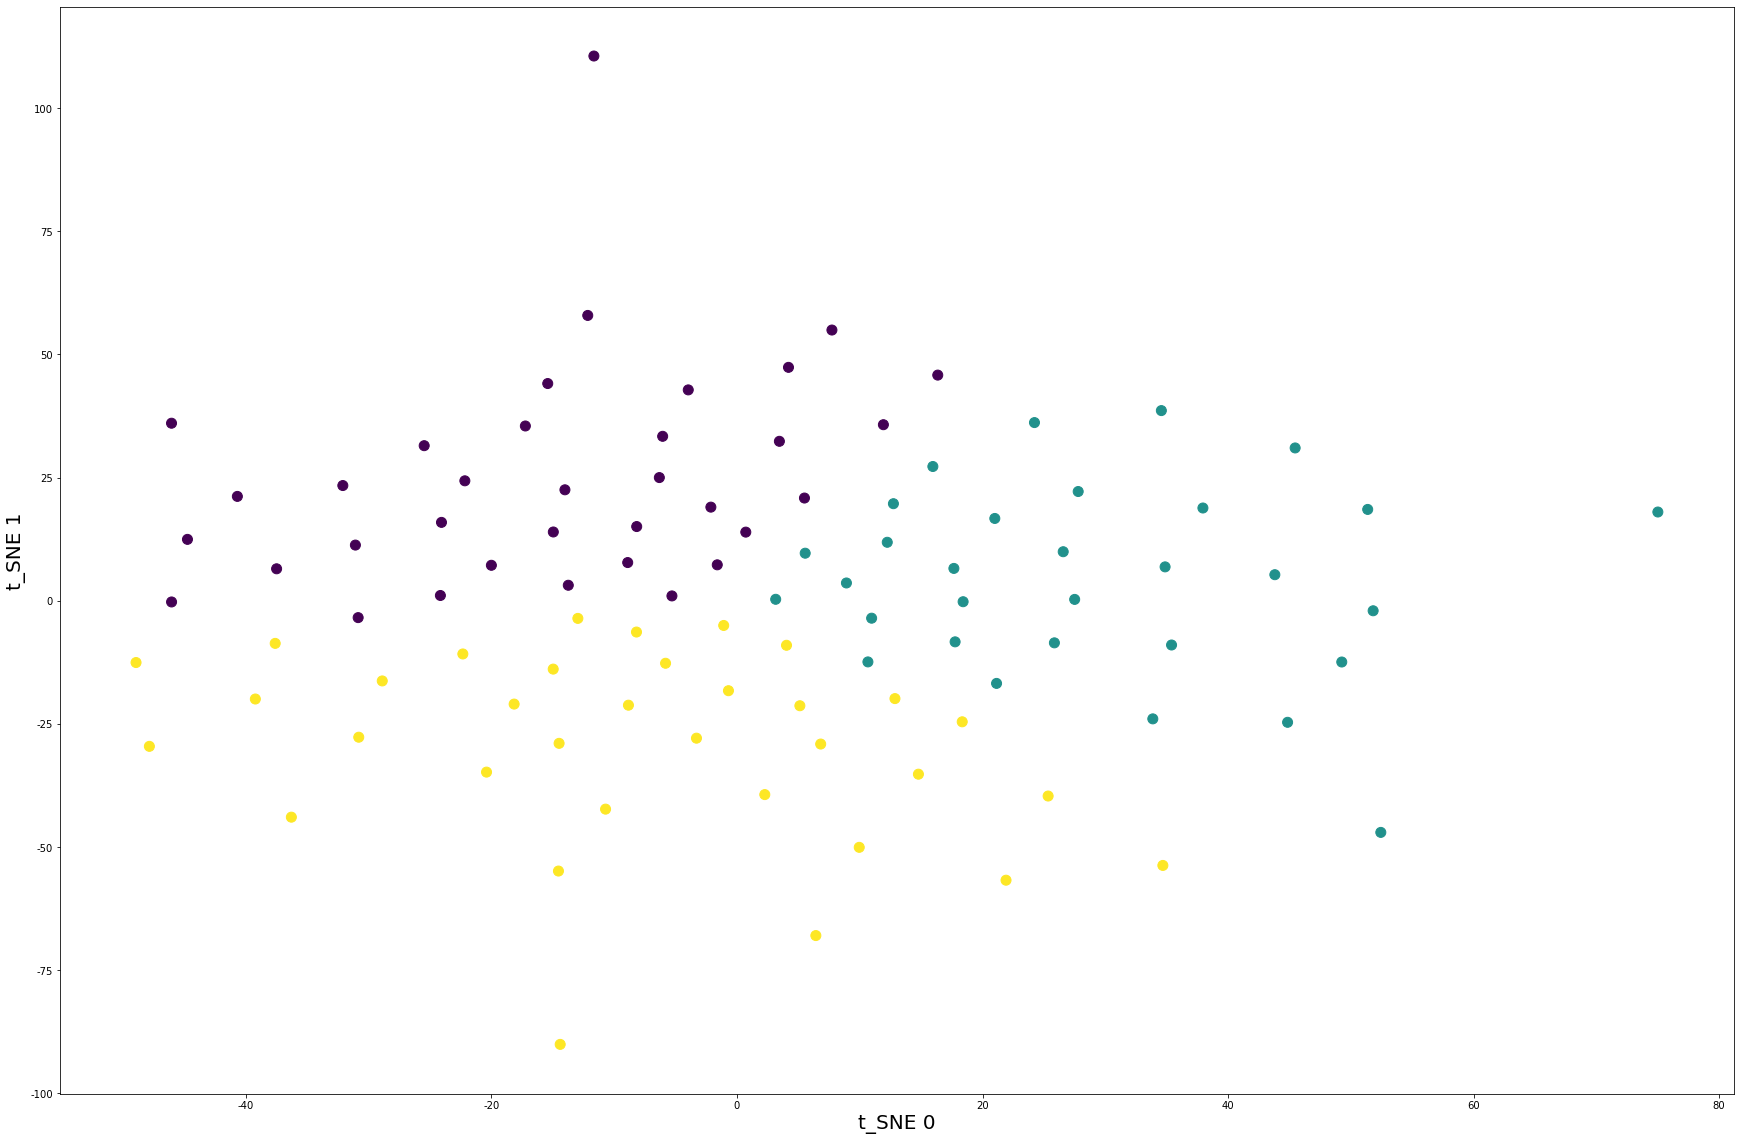

In [305]:
fig = plt.figure()
fig.set_size_inches(30,20)
ax = fig.add_subplot(1,1,1)
ax.scatter(df['x'], df['y'], s=100, c=labels)

plt.xlabel("t_SNE 0", fontsize=20)
plt.ylabel("t_SNE 1", fontsize=20)
plt.show()

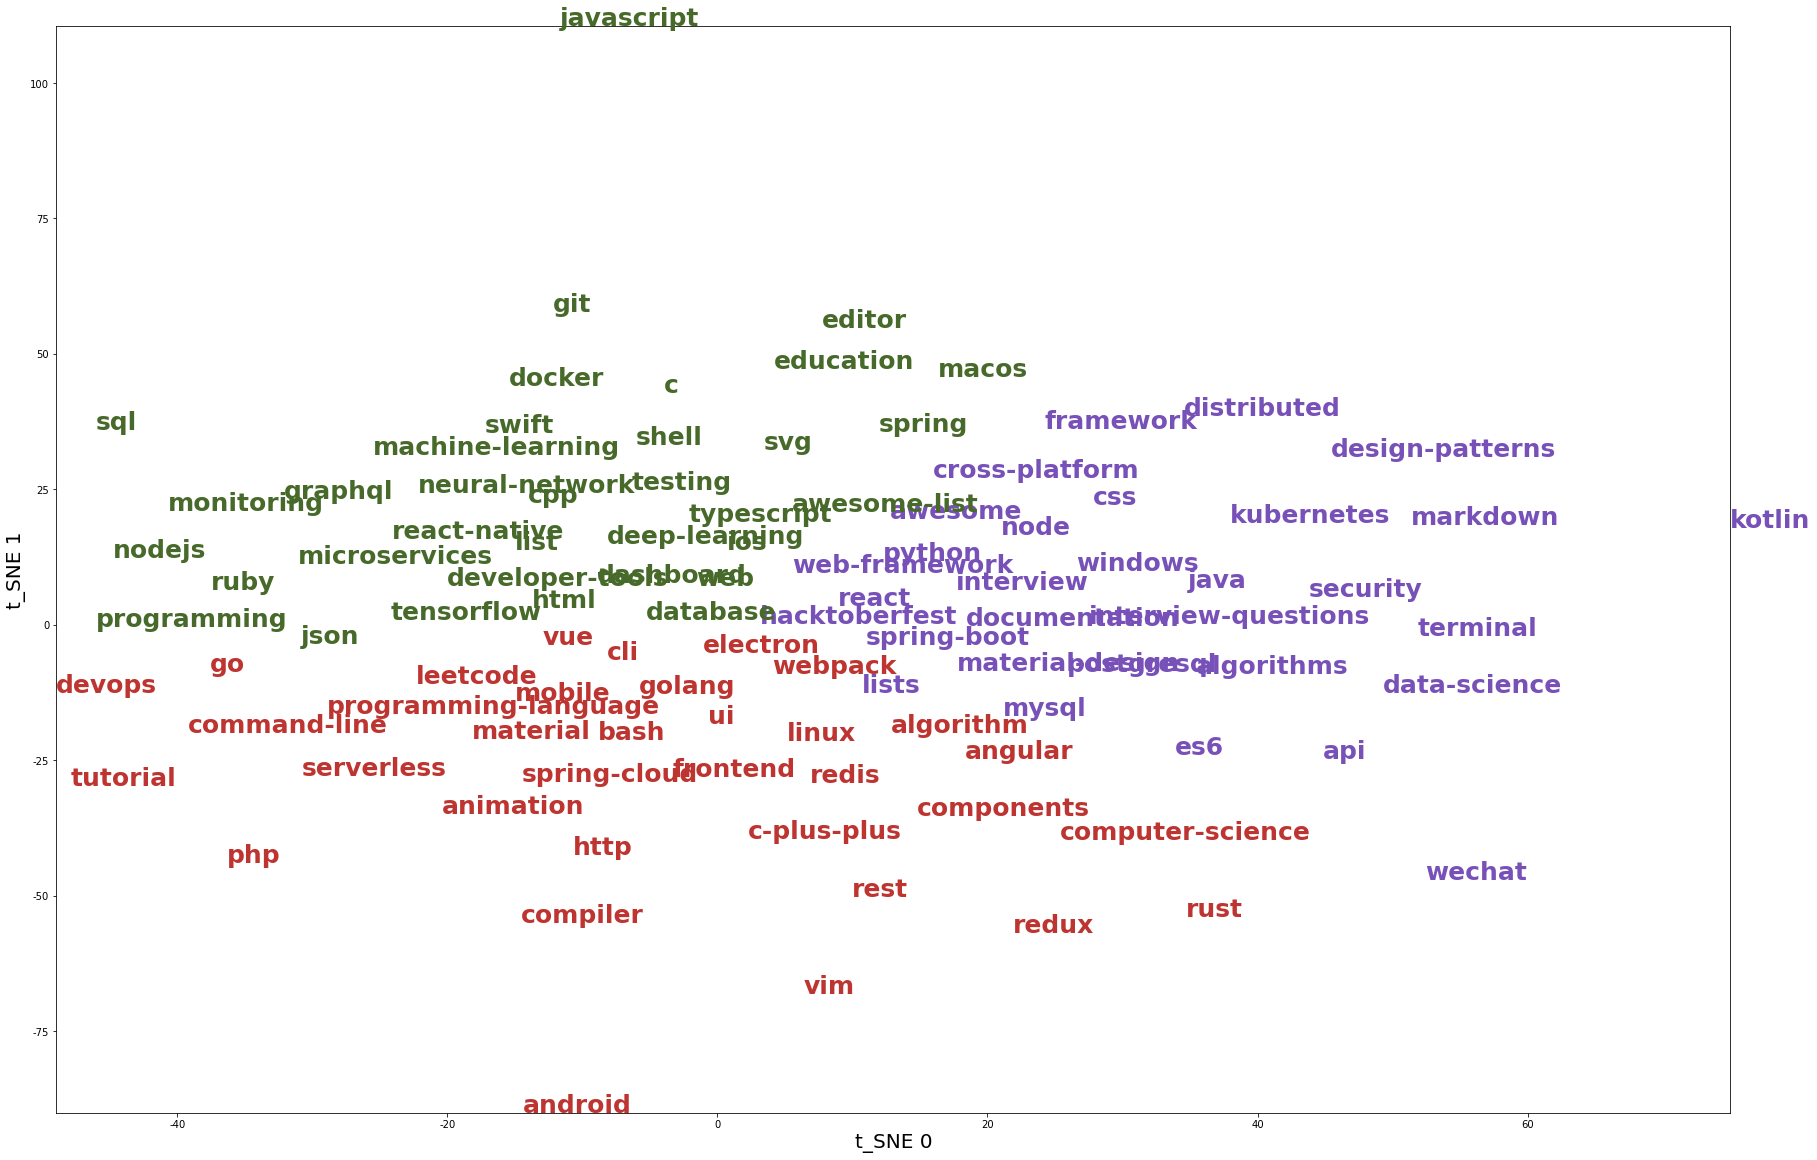

In [330]:
# grids = []
# for perplexity in [10,20,30,40,50]:
#     p = figure(width=600, height=600, title='perplexity = {}'.format(perplexity))
#     X_tsne = TSNE(n_components=2, verbose=1, perplexity=perplexity, n_iter=300).fit_transform(X_show)
#     for c in range(3):
#         idx = np.where()

# fig = plt.figure()
# fig.set_size_inches(30,20)
# ax = fig.add_subplot(1,1,1)
# ax.scatter(df['x'], df['y'], s=100, c=labels)
plt.figure(figsize=(30,20))

for i in range(len(X_show)):
    plt.text(X_tsne[i,0], X_tsne[i,1], str(df.index[i]),
             color=colors[labels[i]],
             fontdict={'weight':'bold', 'size':25})
    
# for word, pos in df.iterrows():
#     ax.annotate(word, pos, fontsize=25)

plt.xlim(X_tsne[:,0].min(), X_tsne[:,0].max())
plt.ylim(X_tsne[:,1].min(), X_tsne[:,1].max())

plt.xlabel("t_SNE 0", fontsize=20)
plt.ylabel("t_SNE 1", fontsize=20)
plt.show()

## PCA 시각화

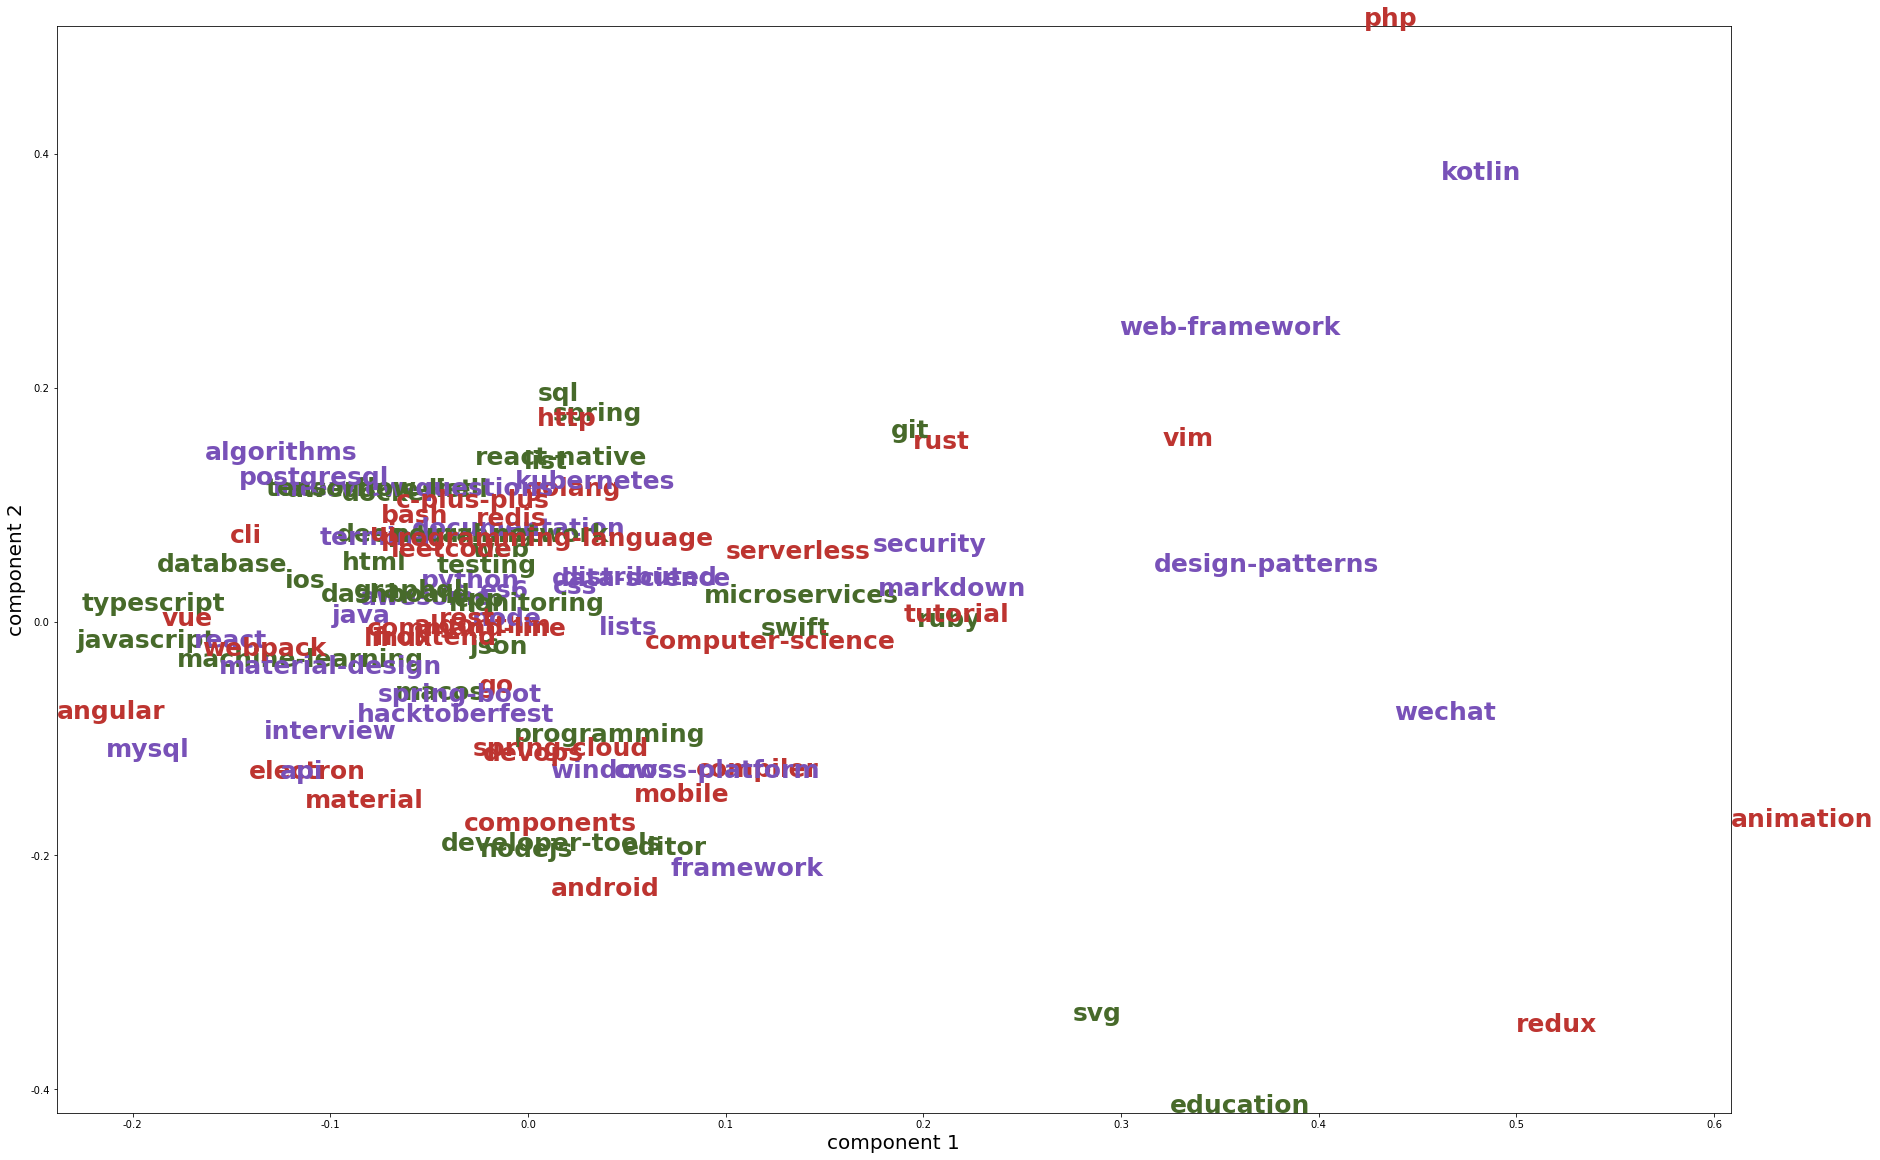

In [298]:
X_show = X[:100,:]
vocab_show = words[:100]
pca = PCA(n_components=2)
pca.fit(X_show)
x_pca = pca.transform(X_show)


kmeans = KMeans(n_clusters=3)
kmeans.fit(df)
labels = kmeans.labels_

colors = ['#476A2A', '#7851B8', '#BD3430', '#4A2D4E', '#875525',
               '#A83683', '#4E655E', '#853541', '#3A3120', '#535D8E']

plt.figure(figsize=(30,20))
plt.xlim(x_pca[:,0].min(), x_pca[:,0].max())
plt.ylim(x_pca[:,1].min(), x_pca[:,1].max())

for i in range(len(X_show)):
    plt.text(x_pca[i,0], x_pca[i,1], str(vocab_show[i]),
             color=colors[labels[i]],
             fontdict={'weight':'bold', 'size':25})
plt.xlabel('component 1', fontsize=20)
plt.ylabel('component 2', fontsize=20)
plt.show()

In [309]:
x_pca

array([[-2.28001431e-01, -2.25351844e-02],
       [-5.39513379e-02,  2.90743858e-02],
       [-8.67292583e-02, -8.54272097e-02],
       [-1.68904498e-01, -2.23275032e-02],
       [-2.45802235e-02, -6.07401691e-02],
       [-2.44677588e-02, -2.00472981e-01],
       [-9.93575603e-02, -1.00545224e-03],
       [-8.49158168e-02,  1.48203056e-02],
       [ 1.17410924e-02, -2.33903304e-01],
       [-1.77795783e-01, -3.79956104e-02],
       [-1.21700451e-01,  1.07326053e-01],
       [ 1.24441311e-02,  2.36458313e-02],
       [-2.25875303e-01,  9.41753667e-03],
       [-9.65497047e-02,  6.81719109e-02],
       [-1.85108006e-01, -3.56463366e-03],
       [ 7.18848854e-02, -2.17208207e-01],
       [-6.73957095e-02, -6.63999468e-02],
       [-1.36959041e-03,  1.08135425e-01],
       [-9.42503288e-02,  4.45099287e-02],
       [-1.22760966e-01,  2.93916892e-02],
       [ 1.10576842e-02, -1.32984921e-01],
       [-1.05421871e-01,  6.60277829e-02],
       [-8.31789449e-02, -2.04234160e-02],
       [-1.